# Indian Liver Patient Dataset 

In [51]:
# import the labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score,precision_score,f1_score


# load the dataset

In [52]:
df=pd.read_csv('C:\\Users\\PMLS\\Favorites\\Machine learning &classification\\Indian Liver Patient Dataset (ILPD).csv')
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [53]:
df.head() # gives first 5 lines


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [54]:
df.tail()# gives last 5 lines

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [56]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # cheking the unique values

Unique values in age: [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
Unique values in gender: ['Female' 'Male']
Unique values in tot_bilirubin: [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
Unique values in direct_bilirubin: [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2

# Encoding by Map function

In [57]:
df['gender']=df['gender'].map({'Female':0, 'Male':1}) 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [59]:
df.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Checking the missing values

In [60]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [61]:
df['alkphos'] = df['alkphos'].fillna(df['alkphos'].mean())  # Fills missing values in 'column' with its mean

In [62]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

# check the drop values

In [63]:
df.duplicated().sum()

np.int64(13)

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.sample(5)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
454,28,1,0.6,0.2,159,15,16,7.0,3.5,1.00,2
171,44,0,1.9,0.6,298,378,602,6.6,3.3,1.00,1
28,20,1,1.1,0.5,128,20,30,3.9,1.9,0.95,2
565,43,1,22.5,11.8,143,22,143,6.6,2.1,0.46,1
316,44,1,0.9,0.2,182,29,82,7.1,3.7,1.00,2


In [67]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [68]:
df.shape

(570, 11)

# Counts the values of features

In [69]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: age
age
60    34
45    25
50    23
38    20
32    20
      ..
78     1
11     1
67     1
10     1
90     1
Name: count, Length: 72, dtype: int64

Column: gender
gender
1    430
0    140
Name: count, dtype: int64

Column: tot_bilirubin
tot_bilirubin
0.8     89
0.7     76
0.9     56
0.6     44
1.0     27
        ..
7.7      1
15.6     1
12.1     1
25.0     1
15.0     1
Name: count, Length: 113, dtype: int64

Column: direct_bilirubin
direct_bilirubin
0.2     192
0.1      60
0.3      50
0.8      22
0.4      20
       ... 
6.1       1
19.7      1
7.7       1
6.0       1
13.7      1
Name: count, Length: 80, dtype: int64

Column: tot_proteins
tot_proteins
198    11
298    11
215    11
190    10
195    10
       ..
515     1
560     1
500     1
98      1
184     1
Name: count, Length: 263, dtype: int64

Column: albumin
albumin
25     25
20     22
22     18
18     17
28     17
       ..
321     1
233     1
173     1
213     1
131     1
Name: count, Length: 152, dtype: int64

Column: ag

# check the outliers 

<Axes: ylabel='direct_bilirubin'>

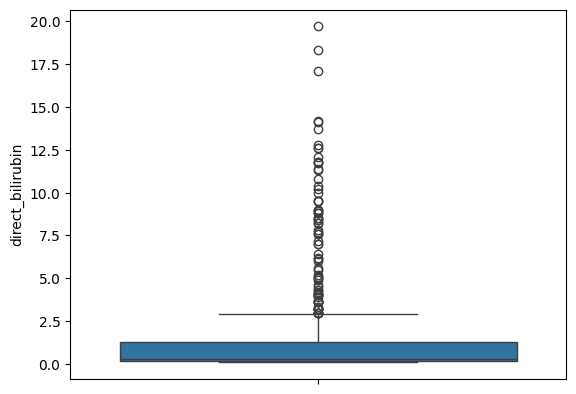

In [70]:
sns.boxplot(df['direct_bilirubin'])

In [71]:
#  we can handle the outliers by IQR method
Q1 = df['direct_bilirubin'].quantile(0.25)
Q3 = df['direct_bilirubin'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['direct_bilirubin'] = np.where(df['direct_bilirubin'] < lower_limit, lower_limit,
                                  np.where(df['direct_bilirubin'] > upper_limit, upper_limit, df['direct_bilirubin']))


Lower Limit: -1.4500000000000002
Upper Limit: 2.95


<Axes: ylabel='direct_bilirubin'>

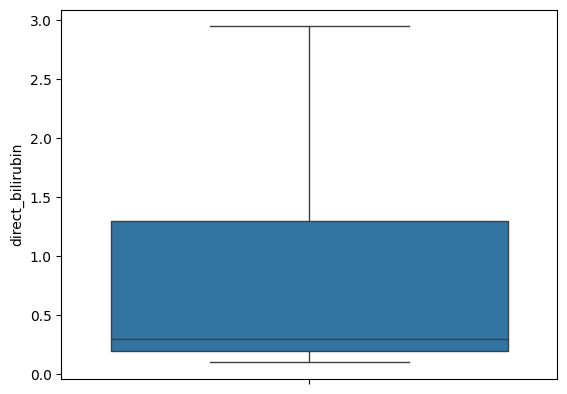

In [72]:
sns.boxplot(df['direct_bilirubin'])

<Axes: ylabel='tot_bilirubin'>

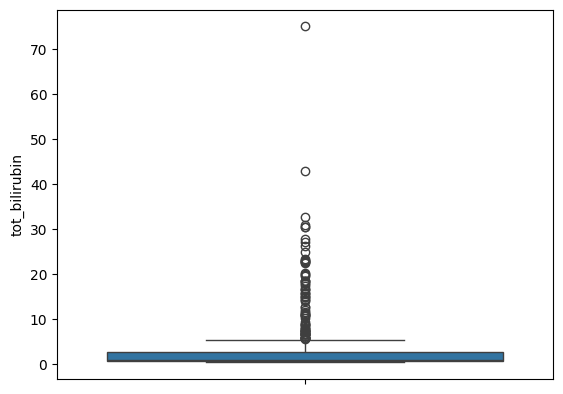

In [73]:
sns.boxplot(df['tot_bilirubin'])

In [74]:
Q1 = df['tot_bilirubin'].quantile(0.25)
Q3 = df['tot_bilirubin'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['tot_bilirubin'] = np.where(df['tot_bilirubin'] < lower_limit, lower_limit,
                                  np.where(df['tot_bilirubin'] > upper_limit, upper_limit, df['tot_bilirubin']))

Lower Limit: -1.9000000000000001
Upper Limit: 5.300000000000001


<Axes: ylabel='tot_bilirubin'>

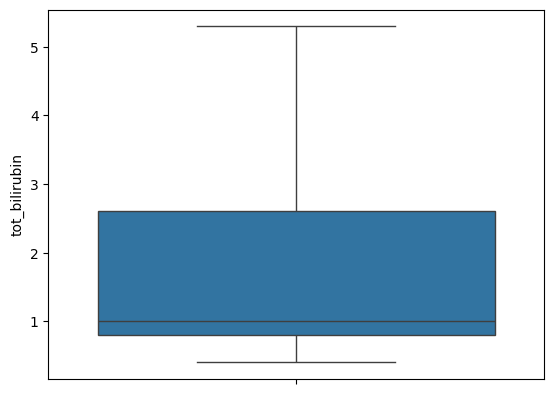

In [75]:
sns.boxplot(df['tot_bilirubin'])

<Axes: ylabel='tot_proteins'>

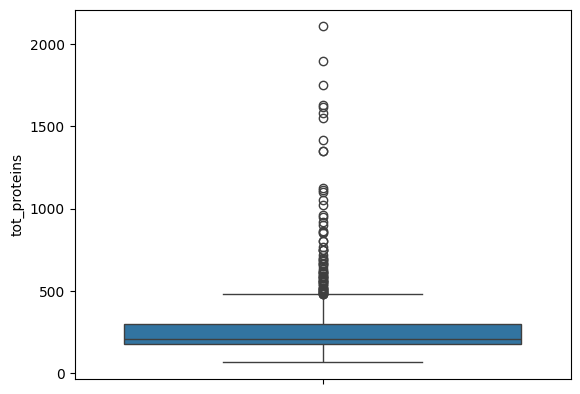

In [76]:
sns.boxplot(df['tot_proteins'])

In [77]:
Q1 = df['tot_proteins'].quantile(0.25)
Q3 = df['tot_proteins'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['tot_proteins'] = np.where(df['tot_proteins'] < lower_limit, lower_limit,
                                  np.where(df['tot_proteins'] > upper_limit, upper_limit, df['tot_proteins']))

Lower Limit: -7.0
Upper Limit: 481.0


<Axes: ylabel='tot_proteins'>

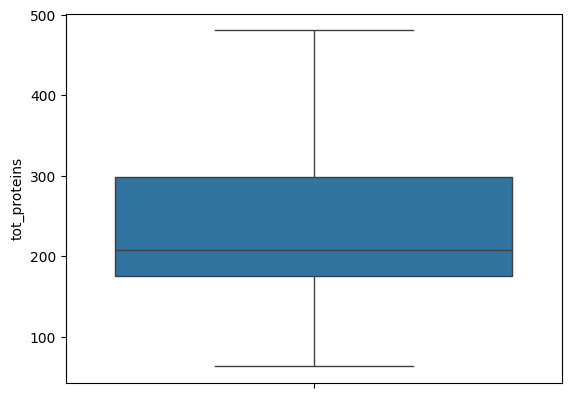

In [78]:
sns.boxplot(df['tot_proteins'])

<Axes: ylabel='albumin'>

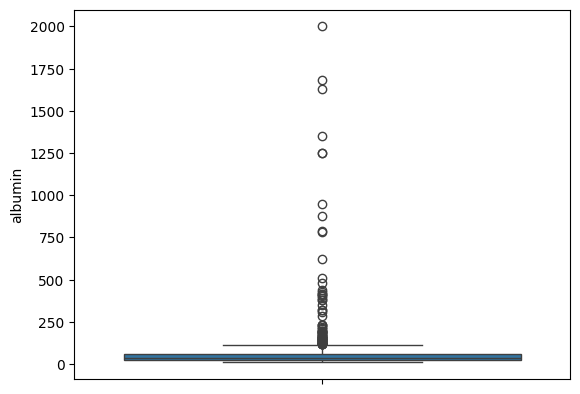

In [79]:
sns.boxplot(df['albumin'])

In [80]:
Q1 = df['albumin'].quantile(0.25)
Q3 = df['albumin'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['albumin'] = np.where(df['albumin'] < lower_limit, lower_limit,
                                  np.where(df['albumin'] > upper_limit, upper_limit, df['albumin']))

Lower Limit: -32.5
Upper Limit: 115.5


<Axes: ylabel='albumin'>

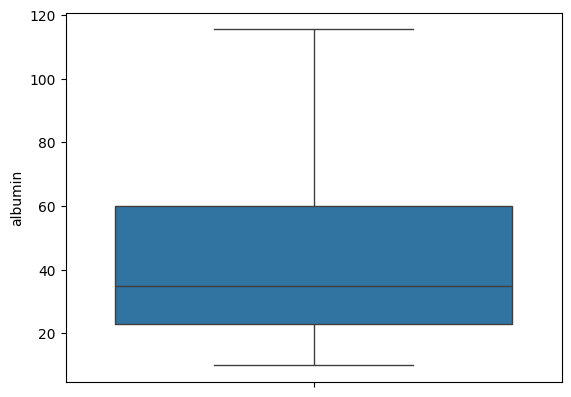

In [81]:
sns.boxplot(df['albumin'])

<Axes: ylabel='ag_ratio'>

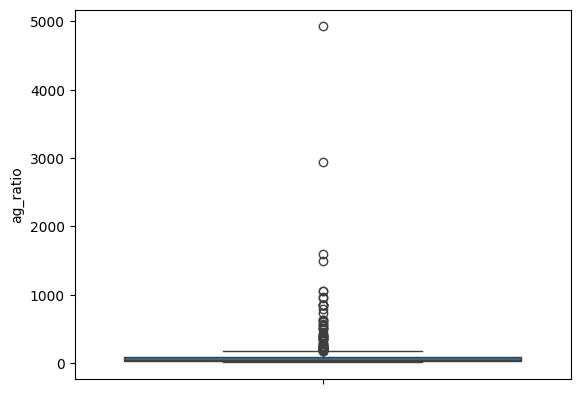

In [82]:
sns.boxplot(df['ag_ratio'])

In [83]:
Q1 = df['ag_ratio'].quantile(0.25)
Q3 = df['ag_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['ag_ratio'] = np.where(df['ag_ratio'] < lower_limit, lower_limit,
                                  np.where(df['ag_ratio'] > upper_limit, upper_limit, df['ag_ratio']))

Lower Limit: -67.625
Upper Limit: 179.375


<Axes: ylabel='ag_ratio'>

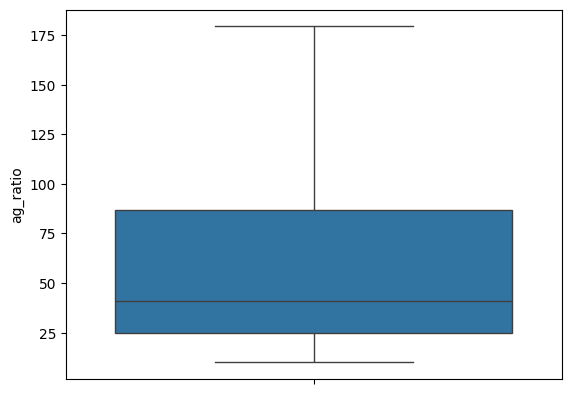

In [84]:
sns.boxplot(df['ag_ratio'])

<Axes: ylabel='sgpt'>

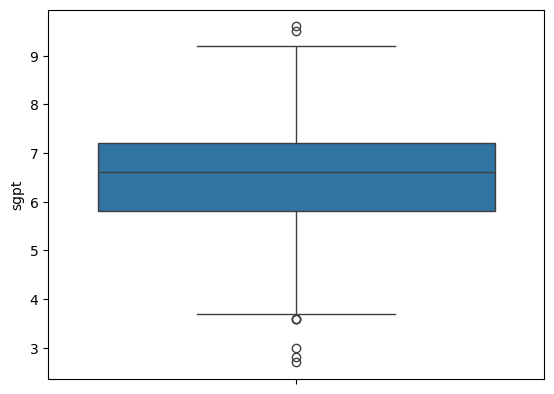

In [85]:
sns.boxplot(df['sgpt'])

In [86]:
Q1 = df['sgpt'].quantile(0.25)
Q3 = df['sgpt'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['sgpt'] = np.where(df['sgpt'] < lower_limit, lower_limit,
                                  np.where(df['sgpt'] > upper_limit, upper_limit, df['sgpt']))

Lower Limit: 3.6999999999999993
Upper Limit: 9.3


<Axes: ylabel='sgpt'>

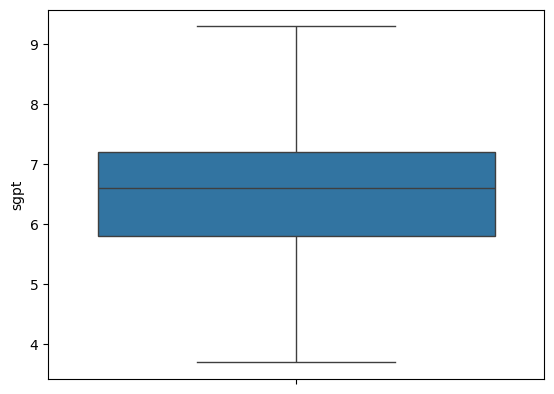

In [87]:
sns.boxplot(df['sgpt'])

<Axes: ylabel='alkphos'>

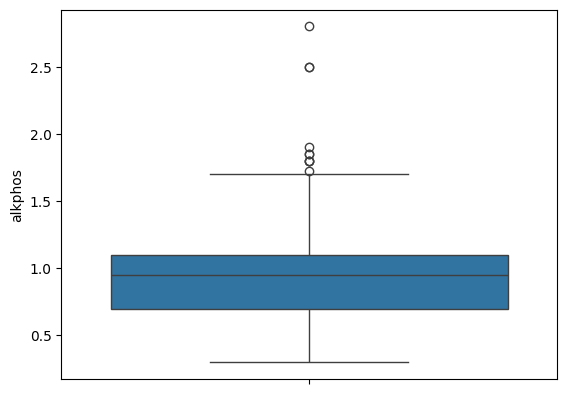

In [88]:
sns.boxplot(df['alkphos'])

In [89]:
Q1 = df['alkphos'].quantile(0.25)
Q3 = df['alkphos'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df['alkphos'] = np.where(df['alkphos'] < lower_limit, lower_limit,
                                  np.where(df['alkphos'] > upper_limit, upper_limit, df['alkphos']))

Lower Limit: 0.09999999999999976
Upper Limit: 1.7000000000000002


<Axes: ylabel='alkphos'>

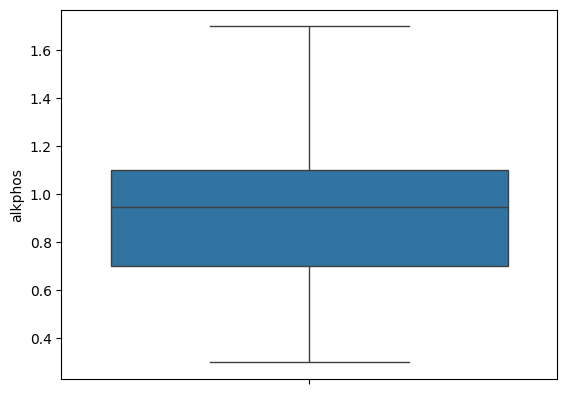

In [90]:
sns.boxplot(df['alkphos'])

<Axes: xlabel='age', ylabel='Count'>

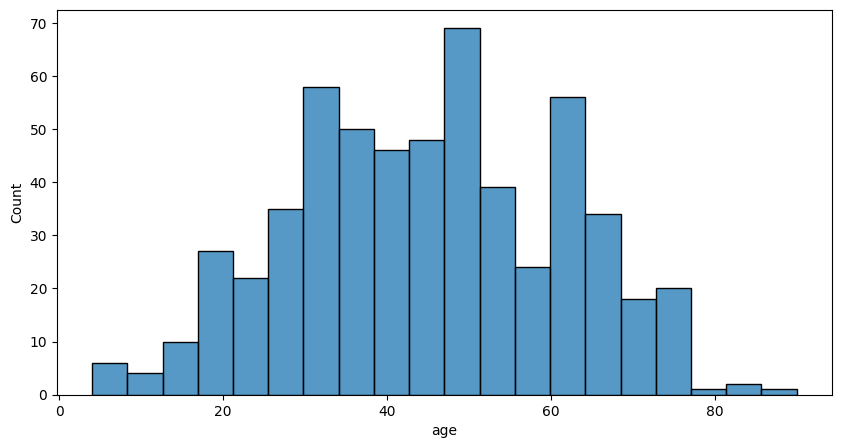

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='age',bins=20)

<Axes: xlabel='is_patient', ylabel='age'>

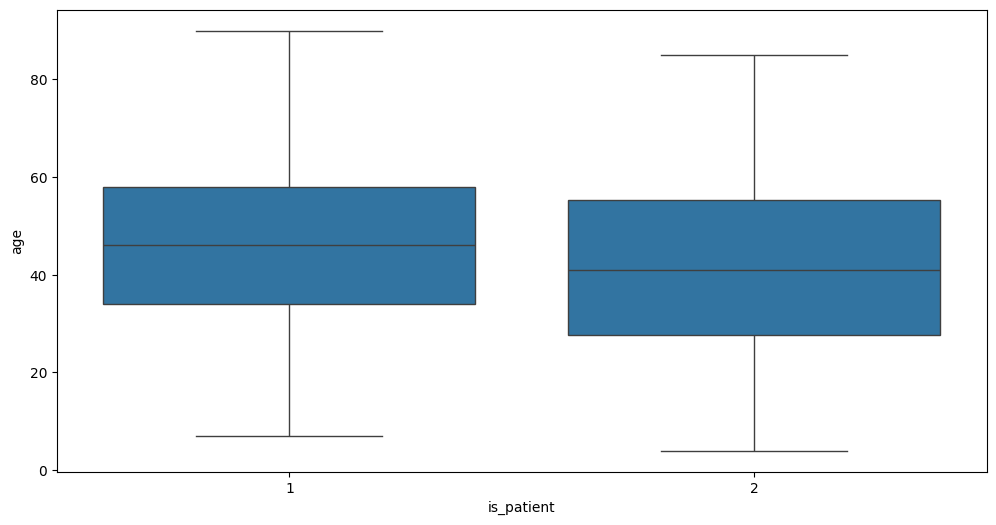

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='is_patient',y='age')

<Axes: xlabel='is_patient', ylabel='count'>

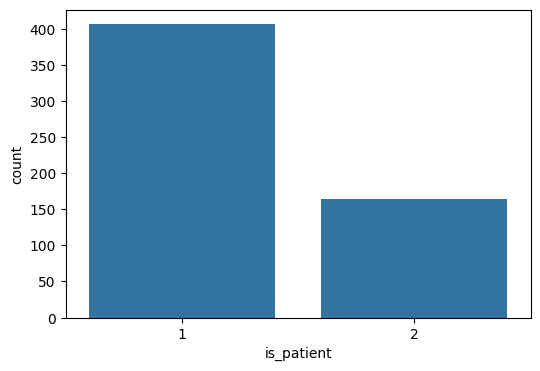

In [94]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_patient')

# split the data

In [95]:
X=df.drop('is_patient',axis=1)
y=df['is_patient']

In [96]:
df['is_patient'].value_counts()


is_patient
1    406
2    164
Name: count, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)

(456, 10)
(114, 10)


In [100]:
# sscaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train_model

In [125]:
# train the model
model=LogisticRegression()
model.fit(X_train,y_train)
#predict the model
pred=model.predict(X_test)
# gives the accuracy of the model
print('accuracy_score:', accuracy_score(y_test, pred))
print('precision_score:', precision_score(y_test, pred))
print('f1_score:', f1_score(y_test, pred))


accuracy_score: 0.7456140350877193
precision_score: 0.7916666666666666
f1_score: 0.8397790055248618


C:\Users\PMLS\anaconda3\envs\MLlearning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
#predict the model
pred1=model1.predict(X_test)
# gives the accuracy of the model
print('accuracy_score:', accuracy_score(y_test, pred1))
print('precision_score:', precision_score(y_test, pred1))
print('f1_score:', f1_score(y_test, pred1))

accuracy_score: 0.7631578947368421
precision_score: 0.8152173913043478
f1_score: 0.847457627118644


In [111]:
model2= KNeighborsClassifier()
model2.fit(X_train,y_train)
#predict the model
pred2=model2.predict(X_test)
# gives the accuracy of the model
print('accuracy_score:', accuracy_score(y_test, pred2))
print('precision_score:', precision_score(y_test, pred2))
print('f1_score:', f1_score(y_test, pred2))

accuracy_score: 0.6578947368421053
precision_score: 0.7674418604651163
f1_score: 0.7719298245614035


In [113]:
from sklearn.svm import SVC
model3=model = SVC()
model3.fit(X_train,y_train)
#predict the model
pred3=model3.predict(X_test)
# gives the accuracy of the model
print('accuracy_score:', accuracy_score(y_test, pred3))
print('precision_score:', precision_score(y_test, pred3))
print('f1_score:', f1_score(y_test, pred3))

accuracy_score: 0.7456140350877193
precision_score: 0.7456140350877193
f1_score: 0.8542713567839196
